In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [188]:
df=pd.read_csv('COVID-19-geographic-disbtribution-worldwide-2020-10-06.csv', low_memory=False)
display(df.head())

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,10/6/20,6,10,2020,145,5,Afghanistan,AF,AFG,38041757.0,Asia,1.083020,NaN,NaN,NaN,NaN,NaN
1,10/5/20,5,10,2020,44,0,Afghanistan,AF,AFG,38041757.0,Asia,0.780721,NaN,NaN,NaN,NaN,NaN
2,10/4/20,4,10,2020,7,4,Afghanistan,AF,AFG,38041757.0,Asia,0.665059,NaN,NaN,NaN,NaN,NaN
3,10/3/20,3,10,2020,5,0,Afghanistan,AF,AFG,38041757.0,Asia,0.975244,NaN,NaN,NaN,NaN,NaN
4,10/2/20,2,10,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.085649,NaN,NaN,NaN,NaN,NaN


In [189]:
#Get rid of extra columns (everything past Cumulative_number_for_14_days_ofCOVID_19_cases_per_100000)
df=df.iloc[:,:12]
#Reverse order of dates so plot is with increasing time
df= df.iloc[::-1]
#Make sure dataframe is reversed
display(df.head())

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
47270,3/21/20,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
47269,3/22/20,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
47268,3/23/20,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
47267,3/24/20,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
47266,3/25/20,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [177]:
#slice for countries that will be included in visualization
countries=['France', 'India', 'United_States_of_America']
df_sliced=df[df['countriesAndTerritories'].isin(countries)]
display(df_sliced.head(), df_sliced.shape, df_sliced.describe())

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
45435,12/31/19,31,12,2019,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
45434,1/1/20,1,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
45433,1/2/20,2,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
45432,1/3/20,3,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
45431,1/4/20,4,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN


(842, 12)

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,842.000000,842.000000,842.000000,842.000000,842.000000,8.420000e+02,803.000000
mean,15.530879,5.141330,2019.996437,17539.080760,410.997625,5.865734e+08,60.224348
std,8.924155,2.681726,0.059619,24660.725969,572.191675,5.610964e+08,75.106484
min,1.000000,1.000000,2019.000000,-766.000000,0.000000,6.701288e+07,0.000000
25%,8.000000,3.000000,2020.000000,12.500000,0.000000,6.701288e+07,0.448691
50%,15.000000,5.000000,2020.000000,3195.500000,84.000000,3.290649e+08,20.507997
75%,23.000000,7.000000,2020.000000,28293.000000,760.500000,1.366418e+09,93.866169
max,31.000000,12.000000,2020.000000,97894.000000,4928.000000,1.366418e+09,282.723242


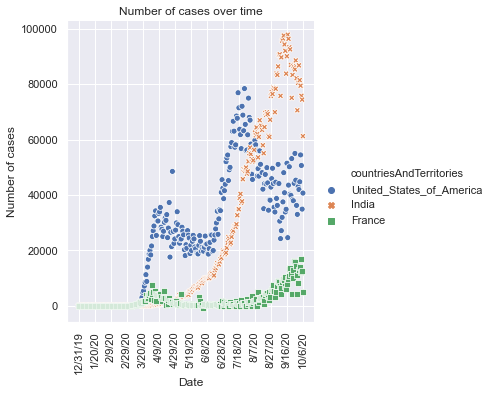

In [187]:
#Plot number of cases by date sorted by country
sns.set()
g=sns.relplot(x='dateRep', y='cases', data=df_sliced, hue='countriesAndTerritories', style='countriesAndTerritories')
g.set(xlabel='Date', ylabel='Number of cases', title='Number of cases over time')
plt.xticks(rotation=90)
plt.xticks(np.arange(0, 300, 20))
plt.show()